In [1]:
# Import Dependancies
import hvplot.pandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
# Create a file path for the cleaned csv file
path = 'Cleaned_Crimes_-_2016_to_present.csv'

# Read csv file with pandas
cleaned_crime_data = pd.read_csv(path, encoding='ISO-8859-1')
cleaned_crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [3]:
# Create a copy of the cleaned_crime_data for alterations
altered_crime_data = cleaned_crime_data.copy()

# Group by 'Block' and then using the aggregate function to get the max 'Latitude' and 'Longitude'
agg_df = altered_crime_data.groupby('Block').agg({
    'Latitude': 'max', 
    'Longitude': 'max'
}).reset_index()

# Merge the aggregated max latitude and longitude back into the original DataFrame
altered_crime_data = altered_crime_data.merge(agg_df, on='Block', suffixes=('', '_max'))

# Replace the 'Latitude' and 'Longitude' with the max values for each block
altered_crime_data['Latitude'] = altered_crime_data['Latitude_max']
altered_crime_data['Longitude'] = altered_crime_data['Longitude_max']

# Drop the temporary columns
altered_crime_data.drop(columns=['Latitude_max', 'Longitude_max'], inplace=True)

altered_crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755951,"(41.917838056, -87.755968972)"
1,10977,13212644,JG425661,09/15/2023 03:30:00 PM,020XX N LARAMIE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,36.0,19.0,08B,1141389.0,1913121.0,2023,09/23/2023 03:42:06 PM,41.917838,-87.755951,"(41.917678861, -87.755963058)"
2,11192,13212642,JG425720,09/15/2023 05:30:00 PM,020XX N LARAMIE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,...,36.0,19.0,08A,1141389.0,1913121.0,2023,09/23/2023 03:42:06 PM,41.917838,-87.755951,"(41.917678861, -87.755963058)"
3,23741,13585645,JH414232,09/03/2024 08:59:00 PM,020XX N LARAMIE AVE,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,...,36.0,19.0,26,1141392.0,1913044.0,2024,09/11/2024 03:41:56 PM,41.917838,-87.755951,"(41.917467509, -87.75595394)"
4,41732,13239829,JG459086,10/11/2023 07:09:00 AM,020XX N LARAMIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,36.0,19.0,08B,1141388.0,1913172.0,2023,10/19/2023 03:42:40 PM,41.917838,-87.755951,"(41.917818829, -87.755965471)"


In [4]:
# Group by 'Primary Type' and get the count of each primary type
top_4_crimes = altered_crime_data.groupby('Primary Type').size()

# Sort values in ascending order and reassign into a list to reference
top_4_crimes = top_4_crimes.sort_values(ascending=True)

# Get only the top 4 crimes
top_4_crimes = top_4_crimes[-4:]

# Convert the Series into a DataFrame and reset the index
top_4_crimes_df = top_4_crimes.reset_index(name='Total Incidents')

# Print the new DataFrame
print(f"You want to find a specific value, which is one of these options:")
top_4_crimes_df

You want to find a specific value, which is one of these options:


,Primary Type,Total Incidents
0,ASSAULT,179954
1,CRIMINAL DAMAGE,243963
2,BATTERY,402701
3,THEFT,489381


In [5]:
# Input the specific value you want to analyze
specific_value = 'battery' # You can capitalized the specific value if you want

# Define your Primary Type
prim_type = altered_crime_data[altered_crime_data['Primary Type'] == f'{specific_value.upper()}'].copy()  # ASSAULT is the specific value I want to find

In [6]:
# We need to convert 'Date' column to datetime format in the new, filtered dataframe
prim_type['Date'] = pd.to_datetime(prim_type['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
# Borrowing Ian's code here
# Next, define pandemic periods
prim_type['Pandemic Period'] = pd.cut(
    prim_type['Date'],
    bins=[
        pd.Timestamp('2017-01-01'),
        pd.Timestamp('2020-01-31'),
        pd.Timestamp('2023-05-11'),

        # Added specific date of the last update for the dataset before downloading
        # Because the bins are exclusive, I made the date one day above the update date
        pd.Timestamp('2024-10-26'), 
    ],
    labels=['Before Pandemic', 'During Pandemic', 'After Pandemic'],

    # This makes the right edge of each bin exclusive which means the first bin will not include the secnod timestamp date.
    # It will only put in values that are up to that date. (example: bin 2 will group all dates from 2020-01-32 to 2023-05-10)
    right = False 
)
# Basic stats and summary by period
print(prim_type.info())
print(prim_type.groupby('Pandemic Period').size())

# Filter data for relevant columns
# Added the block column to count and define our hotspots
# Added 
crime_location_data = prim_type[['Date', 'Primary Type', 'Description', 'Location Description', 'Block', 'Arrest', 'Latitude', 'Longitude', 'Pandemic Period']].dropna()

crime_location_data = crime_location_data[
    (crime_location_data['Latitude'] != 0.0) & # Removes any undifined/missing latitude values
    (crime_location_data['Longitude'] != 0.0) & # Removes any undifined/missing longitude values
    (crime_location_data['Latitude'] > 37.0) # Removes unfortunate outlier
]

<class 'pandas.core.frame.DataFrame'>
Index: 402701 entries, 1 to 2171264
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            402701 non-null  int64         
 1   ID                    402701 non-null  int64         
 2   Case Number           402701 non-null  object        
 3   Date                  402701 non-null  datetime64[ns]
 4   Block                 402701 non-null  object        
 5   IUCR                  402701 non-null  object        
 6   Primary Type          402701 non-null  object        
 7   Description           402701 non-null  object        
 8   Location Description  402701 non-null  object        
 9   Arrest                402701 non-null  bool          
 10  Domestic              402701 non-null  bool          
 11  Beat                  402701 non-null  int64         
 12  District              402701 non-null  float64       
 13  War

C:\Users\Nicze\AppData\Local\Temp\ipykernel_44476\4084879788.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(prim_type.groupby('Pandemic Period').size())


In [8]:
incident_frequency = crime_location_data.groupby(['Block', 'Pandemic Period']).size()

incident_frequency.sort_values(ascending=False)

C:\Users\Nicze\AppData\Local\Temp\ipykernel_44476\50497946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incident_frequency = crime_location_data.groupby(['Block', 'Pandemic Period']).size()


Block                                Pandemic Period
064XX S DR MARTIN LUTHER KING JR DR  Before Pandemic    267
                                     During Pandemic    246
0000X W TERMINAL ST                  During Pandemic    227
                                     Before Pandemic    166
063XX S DR MARTIN LUTHER KING JR DR  Before Pandemic    165
                                                       ... 
058XX W LELAND AVE                   Before Pandemic      0
058XX W LAWRENCE AVE                 After Pandemic       0
020XX N NEWLAND AVE                  During Pandemic      0
020XX N OAK PARK AVE                 Before Pandemic      0
037XX N JANSSEN AVE                  During Pandemic      0
Length: 79089, dtype: int64

In [9]:
# This means that the highest number of incidents on a single block in a single pandemic period is 318
# Thus we make this the value by which to measure the size of our dots. lets save it into a variable
mdb_incident_count = 103 # mdb stands for most dangerous block

In [10]:
# Define the order of the periods (so the output is printed in order)
period_order = ['Before Pandemic', 'During Pandemic', 'After Pandemic']

# Initialize a dictionary to store outlier values for each period
outliers_dict = {}

# Setting up a empty list for later plotting
all_incident_counts = []

# Loop through each period label in the defined order
for period in period_order:
    print(f"Analyzing data for {specific_value.lower()} incidents that occurred {period}\n")
    
    # Filter the data for the current period
    period_data = crime_location_data[crime_location_data['Pandemic Period'] == period]

    # Check the total of the unique value counts for each block during this period
    incident_counts = period_data['Block'].value_counts()
    
    # Remove all blocks with 0 incidents
    incident_counts = incident_counts[incident_counts > 0]

    # After this is calculated, add all those values into the empty list as a sub-list
    all_incident_counts.append(incident_counts.to_list())
    # with this line of code, I can now move the plotting code outside of the loop and plot each period in one chart at the end

    # Calculate Quartile Values for a Boxplot
    quartiles = incident_counts.quantile([0.25, 0.5, 0.75, 1.0])
    lowerq = quartiles[0.25]  # Lower quartile
    upperq = quartiles[0.75]  # Upper quartile
    iqr = upperq - lowerq     # Interquartile range

    # Calculate bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print combined output for quartile calculations
    print(
        f"The lower quartile of {specific_value.lower()} incidents is: {lowerq}\n"
        f"The upper quartile of {specific_value.lower()} incidents is: {upperq}\n"
        f"The interquartile range of {specific_value.lower()} incidents is: {iqr}\n"
        f"Values below {lower_bound} could be outliers.\n"
    )

    # Print combined output for ease of access to important information
    print(
        f"\nIMPORTANT:\n"
        f"\nThis is the outlier data, which we will need to calculate hot spots.\n"
        f"Thus, blocks with values above {upper_bound} are data points that we need to filter for."
    )
    
    # Input upper bound outlier values into a dictionary for each period
    outliers_dict[period] = upper_bound

    # Filter period data to keep only rows where the block incident counts are above the upper bound
    outlier_blocks = incident_counts[incident_counts > upper_bound].index
    period_outliers_df = period_data[period_data['Block'].isin(outlier_blocks)]

    # Uses period label to create a new df to store the new created outliers dataframe
    globals()[f"{period.replace(' ', '_')}_outliers_df"] = period_outliers_df

    print("="*75)  # Separator between different periods


Analyzing data for battery incidents that occurred Before Pandemic

The lower quartile of battery incidents is: 2.0
The upper quartile of battery incidents is: 8.0
The interquartile range of battery incidents is: 6.0
Values below -7.0 could be outliers.


IMPORTANT:

This is the outlier data, which we will need to calculate hot spots.
Thus, blocks with values above 17.0 are data points that we need to filter for.
Analyzing data for battery incidents that occurred During Pandemic

The lower quartile of battery incidents is: 1.5
The upper quartile of battery incidents is: 8.0
The interquartile range of battery incidents is: 6.5
Values below -8.25 could be outliers.


IMPORTANT:

This is the outlier data, which we will need to calculate hot spots.
Thus, blocks with values above 17.75 are data points that we need to filter for.
Analyzing data for battery incidents that occurred After Pandemic

The lower quartile of battery incidents is: 1.0
The upper quartile of battery incidents is: 5.0
T

TypeError: Axes.boxplot() got an unexpected keyword argument 'tickxlabels'

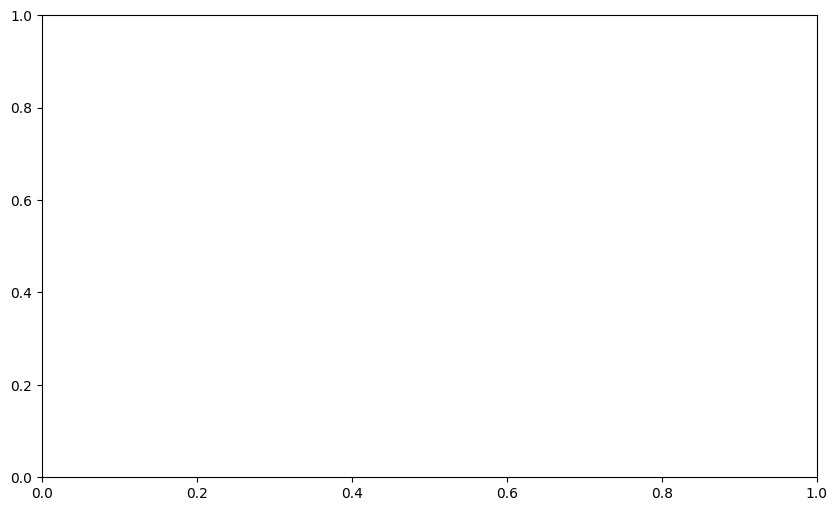

In [12]:
# Make a chart with 3 boxplots, one for each period that was calculated above
fig, ax = plt.subplots(figsize=(10,6)) # Alter figsize if needed (width, height)
ax.boxplot(all_incident_counts, tickxlabels=period_order) # Sets up labels for chart

# Now set up formatting
ax.set_title(f"Total {specific_value.title()} Incidents on Unique Blocks for Each Period")
ax.set_xlabel(f"Pandemic Period")
ax.set_ylabel(f"Frequency of {specific_value.title()} Incidents")

# Display the Chart
plt.show()

# Finally, print out the outliers_dict to show the outlier values at the very bottom
print(outliers_dict)

In [ ]:
# Check new that new outlier pandas DataFrames exist
print(Before_Pandemic_outliers_df.head(1))
print(During_Pandemic_outliers_df.head(1))
print(After_Pandemic_outliers_df.head(1))

#### Step 4: Get the outlier values of the new outlier dataframes 
Because these data points would be the outliers of the outliers, I think that we can define them as "**Hotspots**"

In [ ]:
# This code follows the exact steps as the code above to find the outliers of the outlier dataframe, which is our definition of a hotspot
# The only things that changed are the varible names, the zipped loop, and we are referencing the new dataframes we created in the last step
# to remove the filtering step
outlier_dataframes = ['Before_Pandemic_outliers_df', 'During_Pandemic_outliers_df', 'After_Pandemic_outliers_df']

# Initialize a dictionary and list
outer_outlier_dict = {}
outer_outlier_incident_counts = []

# This zips the outlier_dataframes and period_order together. I did this because I wanted to be able to reference the period in this loop
# I tried a nested loop and that was outputting 9 different analysis. Thus, the zipped loop gets rid of that problem
for period_df, period in zip(outlier_dataframes, period_order):
    
    # Gets the current outlier dataframe and assign it to a new variable
    outer_outlier_df = globals().get(period_df)

    print(f"Analyzing data for {specific_value.lower()} incidents that occurred {period}\n")

    # Calculate the unique value counts for each block within this period-specific DataFrame
    outer_outlier_data = outer_outlier_df['Block'].value_counts()
    outer_outlier_incident_counts.append(outer_outlier_data.to_list())

    # Calculate the quartile values for plotting boxplots
    quartiles = outer_outlier_data.quantile([0.25, 0.5, 0.75, 1.0])
    lowerq = quartiles[0.25]  # Lower quartile
    upperq = quartiles[0.75]  # Upper quartile
    iqr = upperq - lowerq     # Interquartile range

    # Calculate bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print combined output for quartile calculations
    print(
        f"The lower quartile of {specific_value.lower()} incidents is: {lowerq}\n"
        f"The upper quartile of {specific_value.lower()} incidents is: {upperq}\n"
        f"The interquartile range of {specific_value.lower()} incidents is: {iqr}\n"
        f"Values below {lower_bound} could be outliers.\n"
    )

    # Print combined output for hotspot calculations
    print(
        f"\nIMPORTANT:\n"
        f"\nThis is the data that I think defines a 'Hotspot', which is going to be all values that are the outliers of the outliers.\n"
        f"Thus, blocks with incident count values above {upper_bound} are data points that we can now define as 'Hotspots'."
    )
    
    # Input hotspot value into a dictionary for each period
    outer_outlier_dict[period] = upper_bound

    # Filter period data to keep only rows where block counts are above the upper bound
    hotspot_blocks = outer_outlier_data[outer_outlier_data > upper_bound].index
    hotspots_df = outer_outlier_df[outer_outlier_df['Block'].isin(hotspot_blocks)]
    
    # Store the filtered DataFrame back into globals for further analysis if needed
    globals()[f"{period.replace(' ', '_')}_hotspots_df"] = hotspots_df

    print("=" * 75)  # Separator between different periods




In [ ]:
# Make a chart with 3 boxplots, one for each period that was calculated above
fig, ax = plt.subplots(figsize=(10,6)) # Alter figsize if needed (width, height)
ax.boxplot(outer_outlier_incident_counts, tick_labels=period_order) # Keeps labels consistent in both charts

# Now set up formatting
ax.set_title(f"Total Outer Outliers for {specific_value.title()} Incidents on Unique Blocks for Each Period")
ax.set_xlabel(f"Pandemic Period")
ax.set_ylabel(f"Frequency of Outer Outliers for {specific_value.title()} Incidents")

# Display the Chart
plt.show()

# Finally, print out the outliers_dict to show the outlier values at the very bottom
print(outer_outlier_dict)

In [ ]:
# Check new that new hotspot pandas DataFrames exist
print(Before_Pandemic_hotspots_df.head(1))
print(During_Pandemic_hotspots_df.head(1))
print(After_Pandemic_hotspots_df.head(1))

#### Step 4: Plot the newly defined "**Hot Spots**"
Now that we have our hot spots defined it is time to plot them on charts

In [ ]:
# Initialize a list for to reference each new hotspot dataframe
hotspot_dfs = ['Before_Pandemic_hotspots_df', 'During_Pandemic_hotspots_df', 'After_Pandemic_hotspots_df']

# Added a empty list to add data I want to plot later
hotspot_incident_list = []

# Loop through each period-specific outlier DataFrame to generate maps
for hotspot_df, period in zip(hotspot_dfs, period_order):
    
    # Get the current hotspot dataframe for plotting
    hotspot_data = globals().get(hotspot_df).copy()
    
    print(f"Mapping Chicago Hotspots for {specific_value.title()} Incidents {period}\n")

    # Calculate unique value counts for each 'Block' in this period-specific DataFrame
    hotspot_incident_count = hotspot_data['Block'].value_counts()

    # Merge the incident count with the original data based on 'Block'
    hotspot_data = hotspot_data.merge(hotspot_incident_count, left_on='Block', right_index=True, how='left')

    # Rename the resulting column to 'Block_Count' if necessary
    hotspot_data = hotspot_data.rename(columns={'count': 'Block Count'})

    # Create a new variable grouping the lat, lon, and block for plotting
    hotspot_blocks = hotspot_data.groupby(['Block'], as_index=False).agg({'Block Count': 'max', 'Latitude': 'max', 'Longitude': 'max'})

    globals()[f"{period.replace(' ', '_')}_full_hotspot_df"] = hotspot_blocks

    # Calculate sizes based on unique counts for scaled visual effect
    hotspot_blocks['Point Size'] = hotspot_blocks['Block Count'] / mdb_incident_count * 100 # Ensure the scaling is done properly
    hotspot_blocks['Point Size'] = hotspot_blocks['Point Size'] * 2 # Increase the value if hotspots are not well displayed

    # Display map-based plot for Chicago hotspots with `hvplot.points`
    map_plot = hotspot_blocks.hvplot.points(
        'Longitude',
        'Latitude',
        geo=True,
        tiles='CartoLight',  # Enable map background
        color='blue', # Change Color
        alpha=0.75, # Change the transparency
        size='Point Size', # The more incidents that occur, the bigger the point will be on the map
        title=f"Chicago {specific_value.title()} Hotspots {period}", 
        xlabel="Longitude", 
        ylabel="Latitude", 
        frame_width=800, 
        frame_height=600,
        hover_cols=['Block', 'Block Count', 'Latitude', 'Longitude']
    )

    display(map_plot)  # hvplot.points uses display instead of plt.show()

    # hvplot.save(map_plot, f"Chicago_{specific_value.title()}_Hotspots_{period.replace(' ', '_')}.png", fmt="png")

    print('=' * 150)  # Separator between different charts



In [ ]:
Before_Pandemic_hotspots_df.head()

In [ ]:
# Grab a copy of the crime_location_df
hotspot_count_weekly = crime_location_data.copy()

hotspot_count_weekly.head()

In [ ]:
for period in period_order:

    # Grab a copy of the crime_location_df
    line_chart = crime_location_data.copy()
    
    # Get only data fro current period
    period_line = line_chart[line_chart.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Week {period}\n")

    # Set the date to index for plotting
    period_line.set_index('Date', inplace=True)

    # Get the data by week and incident count
    period_line = period_line.resample('W').size()

    # Plot the chart and label them appropriately
    plt.figure(figsize=(12, 6))
    period_line.plot(kind='line')
    plt.title(f"Weekly {specific_value.title()} Incident Counts {period}")
    plt.xlabel("Week")
    plt.ylabel("Number of Incidents")
    plt.ylim(period_line.min() - 10, period_line.max() + 10) # Setting y_limits for consitency across charts. 
    plt.grid(True)
    plt.show()




In [ ]:
for period in period_order:

    # Grab a copy of the crime_location_df
    line_chart = crime_location_data.copy()
    
    # Get only data fro current period
    period_line = line_chart[line_chart.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Month {period}\n")

    # Set the date to index for plotting
    period_line.set_index('Date', inplace=True)

    # Get the data by week and incident count
    period_line = period_line.resample('ME').size()

    # Plot the chart and label them appropriately
    plt.figure(figsize=(12, 6))
    period_line.plot(kind='line')
    plt.title(f"Monthly {specific_value.title()} Incident Counts {period}")
    plt.xlabel("Week")
    plt.ylabel("Number of Incidents")
    plt.ylim(period_line.min() - 10, period_line.max() + 10) # Setting y_limits for consitency across charts. 
    plt.grid(True)
    plt.show()

In [ ]:
crime_location_data.head()

In [ ]:
for period in period_order:

    # Grab a copy of the crime_location_df
    line_chart = crime_location_data.copy()
    
    # Get only data fro current period
    period_line = line_chart[line_chart.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Week {period}\n")

    # Set the date to index for plotting
    period_line.set_index('Date', inplace=True)

    # Get the data by week and incident count
    period_line = period_line.resample('W').size()

    # Plot the chart and label them appropriately
    plt.figure(figsize=(12, 6))
    period_line.plot(kind='line')
    plt.title(f"Weekly {specific_value.title()} Incident Counts {period}")
    plt.xlabel("Week")
    plt.ylabel("Number of Incidents")
    plt.ylim(period_line.min() - 10, period_line.max() + 10) # Setting y_limits for consitency across charts. 
    plt.grid(True)
    plt.show()

In [ ]:
# Description count
for period in period_order:

    # Grab a copy of the crime_location_df
    description_line = crime_location_data.copy()
    
    # Get only data for current period
    description_line = description_line[description_line.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Week {period}\n by Description")

    # Get the data by week and incident count
    description_groups = description_line.groupby('Description').resample('W', on='Date').size()

    # Set index for plotting 
    description_groups = description_groups.reset_index(name='Incident Count')

    # Set chart size
    fig, ax = plt.subplots(figsize=(12, 6))

    # Insert a loop to plot each description line
    for description, data in description_groups.groupby('Description'):
        plt.plot(data['Date'], data['Incident Count'], label=description)

    
    # Now add formatting
    ax.set_title(f"Weekly {specific_value.title()} Incident Counts {period} by description")
    ax.set_xlabel("Week")
    ax.set_ylabel("Number of Incidents")
    ax.set_ylim(description_groups['Incident Count'].min() - 5, description_groups['Incident Count'].max() + 10)  # Setting y_limits for consitency across charts.
    ax.grid(True)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    
    # Positioning the legend outside of the plot area
    ax.legend(title='Description', loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

    plt.tight_layout()
    plt.show()

In [ ]:
# Get rid of simple description
complex_assault = crime_location_data.copy()
complex_assault = complex_assault[complex_assault['Description'] != 'SIMPLE']

In [ ]:
# Re-chart to see other categories
# Description count
for period in period_order:

    # Grab a copy of the crime_location_df
    description_line = complex_assault.copy()
    
    # Get only data for current period
    description_line = description_line[description_line.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Week {period} by Description\n")

    description_groups = (
        description_line.groupby(['Description'])
        .resample('W', on='Date')
        .size()
        .reset_index(name='Incident Count')
    )

    # Set chart size
    fig, ax = plt.subplots(figsize=(12, 6))

    # Insert a loop to plot each description line
    for description, data in description_groups.groupby('Description'):
        plt.plot(data['Date'], data['Incident Count'], label=description)

    
    # Now add formatting
    ax.set_title(f"Weekly {specific_value.title()} Incident Counts {period} by description")
    ax.set_xlabel("Week")
    ax.set_ylabel("Number of Incidents")
    ax.set_ylim(description_groups['Incident Count'].min() - 5, description_groups['Incident Count'].max() + 10)  # Setting y_limits for consitency across charts.
    ax.grid(True)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    
    # Positioning the legend outside of the plot area
    ax.legend(title='Description', loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

    plt.tight_layout()
    plt.show()

In [ ]:
# Create a copy to clean up location descriptions
cleaned_location_description_df = crime_location_data.copy()

# Get rid of all alternative naming comventions by replace non-whitespace on either side of a '/' with spaces
cleaned_location_description_df['Location Description'] = cleaned_location_description_df['Location Description'].replace(r'\s*/\s*', ' / ', regex=True)

# Combine like descriptions for clarity 
cleaned_location_description_df['Location Description'] = (
    cleaned_location_description_df['Location Description']
    .replace(r'.*\bSCHOOL\b.*', 'SCHOOL COMBINED', regex=True)
    .replace(r'.*\bAIRPORT\b.*', 'AIRPORT COMBINED', regex=True)
    .replace(r'.*\bCHA\b.*', 'CHA COMBINED', regex=True)
    .replace(r'.*\bCTA\b.*', 'CTA COMBINED', regex=True)
    .replace(r'.*\bRESIDENCE\b.*', 'RESIDENCE COMBINED', regex=True)
)

In [ ]:
# Location description count
for period in period_order:

    # Grab a copy of the crime_location_df
    location_description_line = cleaned_location_description_df.copy()
    
    # Get only data for current period
    location_description_line = location_description_line[location_description_line.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Week {period} by Location Description\n")

    location_description_groups = (
        location_description_line.groupby(['Location Description'])
        .resample('W', on='Date')
        .size()
        .reset_index(name='Incident Count (Location)')
    )

    # Set chart size
    fig, ax = plt.subplots(figsize=(12, 6))

    # Insert a loop to plot each description line
    for description, data in location_description_groups.groupby('Location Description'):
        plt.plot(data['Date'], data['Incident Count (Location)'], label=description)

    
    # Now add formatting
    ax.set_title(f"Weekly {specific_value.title()} Incident Counts {period} by Location Description")
    ax.set_xlabel("Week")
    ax.set_ylabel("Number of Incidents")
    ax.set_ylim(location_description_groups['Incident Count (Location)'].min() - 5, location_description_groups['Incident Count (Location)'].max() + 10)  # Adjust y-limits
    ax.grid(True)
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    
    # Positioning the legend outside of the plot area
    ax.legend(title='Location Description', loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

    plt.tight_layout()
    plt.show()

In [ ]:
# Location description count
for period in period_order:

    # Grab a copy of the crime_location_df
    arrest_line_df_full = crime_location_data.copy()
    
    # Get only data for current period
    arrest_line_df = arrest_line_df_full[arrest_line_df_full['Pandemic Period'] == period]

    print(f"Mapping Total Chicago Arrests Incidents per Week {period}\n")

    # Get the data by week and incident count based on arrest status
    arrest_line_groups = (
        arrest_line_df.groupby(['Arrest'])
        .resample('W', on='Date')
        .size()
        .reset_index(name='Incident Count')
    )

    # Set chart size
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot each line for Arrest=True and Arrest=False
    for outcome, data in arrest_line_groups.groupby('Arrest'):
        label = 'Arrest' if outcome else 'No Arrest'
        ax.plot(data['Date'], data['Incident Count'], label=label)

    # Formatting
    ax.set_title(f"Weekly Arrest vs. Non-Arrest Incident Counts {period}")
    ax.set_xlabel("Week")
    ax.set_ylabel("Number of Incidents")
    ax.set_ylim(arrest_line_groups['Incident Count'].min() - 5, arrest_line_groups['Incident Count'].max() + 10)  # Adjust y-limits
    ax.grid(True)
    plt.xticks(rotation=45, ha='right')

    # Positioning the legend outside the plot area
    ax.legend(title='Arrest Status', loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

    fig.savefig(f"Weekly Arrest vs. Non-Arrest Incident Counts {period}.png", dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()


In [ ]:
for period in period_order:

    # Grab a copy of the crime_location_df
    line_chart = crime_location_data.copy()
    
    # Get only data fro current period
    period_line = line_chart[line_chart.loc[:, 'Pandemic Period'] == period]

    print(f"Mapping Total Chicago {specific_value.title()} Incidents per Week {period}\n")

    # Set the date to index for plotting
    period_line.set_index('Date', inplace=True)

    # Get the data by week and incident count
    period_line = period_line.resample('W').size()

    # Plot the chart and label them appropriately
    plt.figure(figsize=(12, 6))
    period_line.plot(kind='line')
    plt.title(f"Weekly {specific_value.title()} Incident Counts {period}")
    plt.xlabel("Week")
    plt.ylabel("Number of Incidents")
    plt.ylim(50, 600) # Setting y_limits for consitency across charts. 
    plt.grid(True)
    plt.show()